#**Analyse des écrans pour le catalogue**

##**Introduction**
Dans cette analyse, on explorons les données sur les écrans disponibles sur le marché, ainsi que les résultats d'une enquête de satisfaction client. L'objectif est d'identifier les écrans les plus appréciés, en tenant compte de leurs caractéristiques et de leurs prix, afin de les recommander pour inclusion dans le catalogue du site web spécialisé dans la vente de matériel électronique.

##**1-Chargement des données**

On va commençer par charger les deux ensembles de données, data1 décrivant les caractéristiques des écrans et data2 contenant les résultats de l'enquête de satisfaction client. on explorons également les premières lignes de chaque jeu de données pour comprendre leur structure.

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data1 = pd.read_csv('projet3_data1.csv', sep=",")
data1.head()

,modele,type,marque,resolution,sonorisation,diagonale
0,modele_22,LCD,LLED,HD,no,29
1,modele_7,LCD,PH,4K,no,30
2,modele_1,LCD,PH,8K,yes,32
3,modele_29,LCD,PH,HD,yes,33
4,modele_32,LCD,ql,HD,yes,33


In [24]:
data2 = pd.read_csv('projet3_data2.csv', sep=";")
data2.head()

,modele,client,prix,note_satisfaction_client
1,modele_27,individu_87,NaN,NaN
2,modele_50,individu_285,1414.0,5.0
3,modele_30,individu_603,1467.0,1.0
4,modele_20,individu_840,2137.0,3.0
5,modele_18,individu_4030,1182.0,3.0


In [25]:
data1.tail()

,modele,type,marque,resolution,sonorisation,diagonale
39,modele_3,OLED,QL,HD,no,30
40,modele_30,OLED,QL,HD,no,32
41,modele_39,OLED,QL,8K,yes,29
42,modele_6,OLED,QL,8K,yes,31
43,modele_49,OLED,QL,4K,yes,33


In [26]:
data2.tail()

,modele,client,prix,note_satisfaction_client
4996,modele_42,individu_3228,1650.0,5.0
4997,modele_1,individu_3479,2151.0,1.0
4998,modele_41,individu_3337,1897.0,4.0
4999,modele_29,individu_1125,1229.0,4.0
5000,modele_16,individu_3957,937.0,2.0


#**2. Nettoyage des données**

Dans cette étape, on va effectuer le nettoyage des données en supprimant les doublons, en traitant les valeurs manquantes et en assurant que les données sont correctement formatées pour une analyse ultérieure.

In [28]:
data1 = data1.drop_duplicates()
data1.head()

,modele,type,marque,resolution,sonorisation,diagonale
0,modele_22,LCD,LLED,HD,no,29
1,modele_7,LCD,PH,4K,no,30
2,modele_1,LCD,PH,8K,yes,32
3,modele_29,LCD,PH,HD,yes,33
4,modele_32,LCD,ql,HD,yes,33


In [30]:
data2 = data2.drop_duplicates()
data2.head()

,modele,client,prix,note_satisfaction_client
1,modele_27,individu_87,NaN,NaN
2,modele_50,individu_285,1414.0,5.0
3,modele_30,individu_603,1467.0,1.0
4,modele_20,individu_840,2137.0,3.0
5,modele_18,individu_4030,1182.0,3.0


In [31]:
data1 = data1.dropna()
data1.head()

,modele,type,marque,resolution,sonorisation,diagonale
0,modele_22,LCD,LLED,HD,no,29
1,modele_7,LCD,PH,4K,no,30
2,modele_1,LCD,PH,8K,yes,32
3,modele_29,LCD,PH,HD,yes,33
4,modele_32,LCD,ql,HD,yes,33


In [32]:
data2 = data2.dropna()
data2.head()

,modele,client,prix,note_satisfaction_client
2,modele_50,individu_285,1414.0,5.0
3,modele_30,individu_603,1467.0,1.0
4,modele_20,individu_840,2137.0,3.0
5,modele_18,individu_4030,1182.0,3.0
6,modele_14,individu_1857,1242.0,4.0


##**3-Analyse exploratoire des données**

Comme on a vu dans le cours on a des données catégorielles et des données numérique. on va donner quelques exemple pour l'analyses de ces données.

On va compter d'abbord les effectifs pour explorer le nombre d'occurrences d'une certaine valeur dans un ensemble de données.



In [40]:
Effectifs=data1.groupby('marque')['marque'].count()
Effectifs

marque
LLED     8
PH      22
QL      13
ql       1
Name: marque, dtype: int64

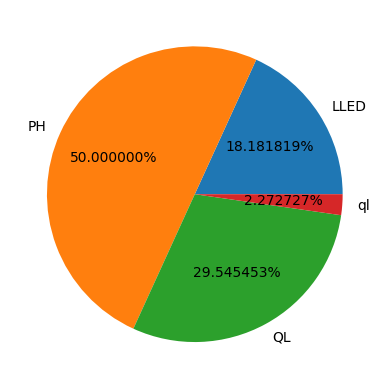

In [50]:
plt.pie(x=Effectifs.values,
        labels=Effectifs.index,
        autopct='%2f%%')
plt.show()

On doit merger les deux fichiers pour faciliter généralement l'analyse des données . on va utiliser la fonction merge().


In [52]:
merged_data = pd.merge(data1, data2, on='modele')
merged_data.head()

,modele,type,marque,resolution,sonorisation,diagonale,client,prix,note_satisfaction_client
0,modele_22,LCD,LLED,HD,no,29,individu_4723,973.0,5.0
1,modele_22,LCD,LLED,HD,no,29,individu_3775,985.0,2.0
2,modele_22,LCD,LLED,HD,no,29,individu_1158,932.0,5.0
3,modele_22,LCD,LLED,HD,no,29,individu_3446,980.0,2.0
4,modele_22,LCD,LLED,HD,no,29,individu_1011,978.0,3.0


In [78]:
merged_data.groupby('marque')['marque'].count()

marque
LLED     909
PH      2501
QL      1483
ql       105
Name: marque, dtype: int64

Après on va entamer les statistiques déscriptives pour les prixs des écrans.

In [63]:
MIN=merged_data['prix'].min()
print(MIN)
MAX=merged_data['prix'].max()
print(MAX)
Moy=merged_data['prix'].mean()
print(Moy)
MEDIANE=merged_data['prix'].median()
print(MEDIANE)



870.0
2824.0
1712.1086434573829
1633.0


In [64]:
merged_data.describe()

,diagonale,prix,note_satisfaction_client
count,4998.000000,4998.000000,4998.000000
mean,30.545218,1712.108643,2.293517
std,3.034235,512.072198,1.235880
min,24.000000,870.000000,0.000000
25%,29.000000,1235.250000,1.000000
50%,31.000000,1633.000000,2.000000
75%,33.000000,2172.000000,3.000000
max,37.000000,2824.000000,5.000000


On va utiliser un histogramme pour représenter la distribution des valeurs de la variable (prix)

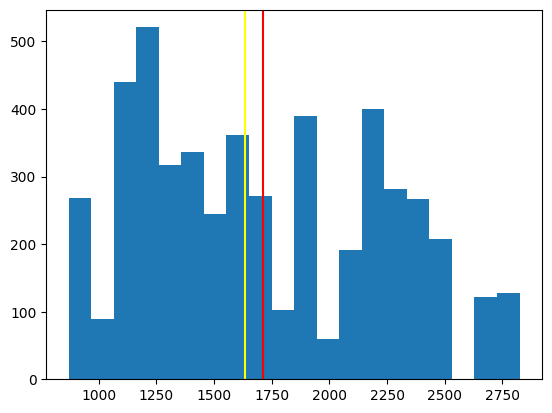

In [69]:
plt.hist(merged_data['prix'],
         bins=20)
plt.axvline(x=Moy,
            color="red")
plt.axvline(x=MEDIANE,
            color="yellow")
plt.show()

On va utiliser un autre histogramme pour représenter la distribution de la satisfaction client.

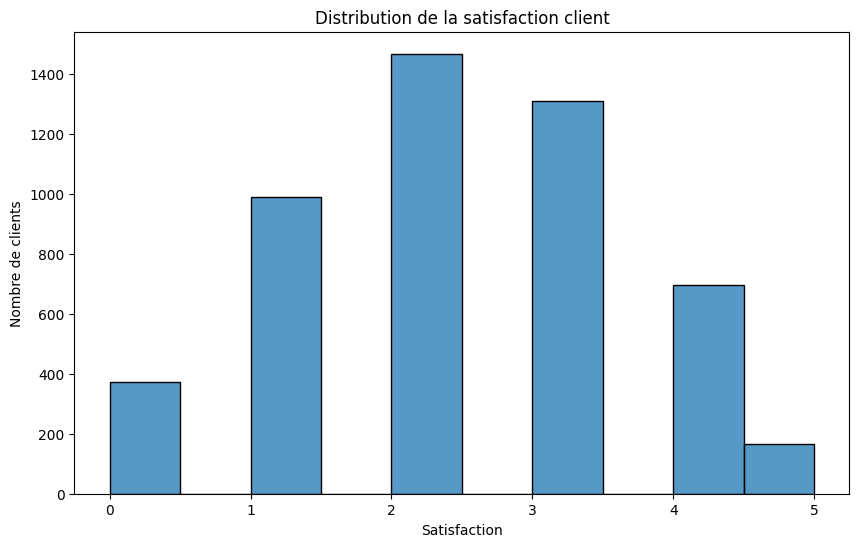

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(data2['note_satisfaction_client'],
             bins=10)
plt.title("Distribution de la satisfaction client")
plt.xlabel("Satisfaction")
plt.ylabel("Nombre de clients")
plt.show()

Après avoir remarquer la distrubution de la satisfaction clients, Là on va identifier **les écrans les plus appréciés** .

Premiérement on va calculer la satisfaction moyenne par écran d'apres leurs marque,trier et afficher les résultats.

In [100]:
top_ecrans = merged_data.groupby("marque")["note_satisfaction_client"].mean().sort_values(ascending=False).head(10)
top_ecrans

marque
LLED    3.046205
PH      2.516194
QL      1.516521
ql      1.447619
Name: note_satisfaction_client, dtype: float64

###**Analyse des prix en fonction des caractéristiques des écrans**

On va analyser la relation entre les types,les marques et les prix.

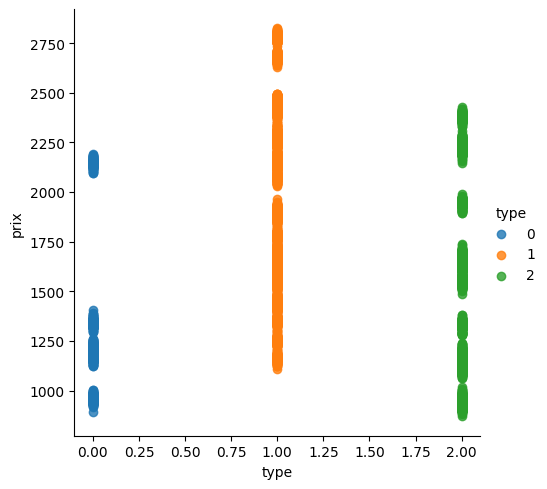

In [103]:
type_mapping = {'LCD': 0, 'OLED': 1, 'LED': 2}
merged_data['type'] = merged_data['type'].replace(type_mapping)
sns.lmplot(data = merged_data,
           x="type",
           y="prix",
           hue="type")

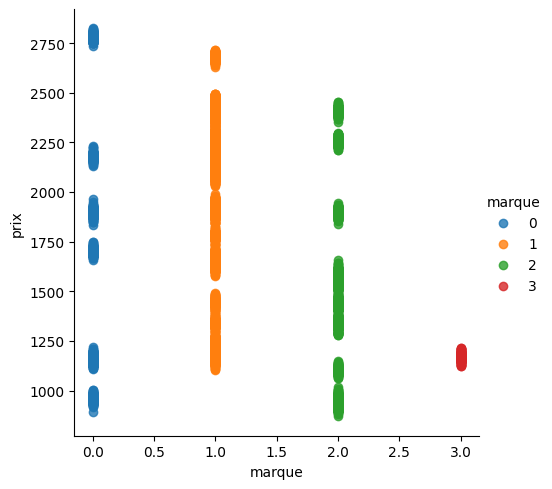

In [109]:
type_mapping = {'LLED': 0, 'PH': 1, 'QL': 2,'ql':3}
merged_data['marque'] = merged_data['marque'].replace(type_mapping)
sns.lmplot(data = merged_data,
           x="marque",
           y="prix",
           hue="marque")

On remarque que la pente de la ligne de régression est négative,cela indique une relation linéaire n"gative entre le prix et la marque. Cela signifie que  la marque influence le prix des écrans Si certaines marques ont tendance à avoir des prix plus élevés que d'autres, cela pourrait indiquer une différence de qualité ou de réputation de la marque.

#**Conclusion**

En conclusion, cette analyse fournit une base solide pour l'élargissement du catalogue d'écrans du site web spécialisé dans la vente de matériel électronique. En utilisant les insights tirés de cette analyse, nous sommes en mesure de recommander des produits qui répondent aux besoins et aux préférences des clients tout en offrant une valeur ajoutée pour l'entreprise.

